<a href="https://colab.research.google.com/github/hhk2763/skills-introduction-to-github/blob/main/Copy_of_CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [143]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_val shape: (48000, 28, 28, 1), y_val shape: (12000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [144]:
x_train.shape

(60000, 28, 28)

In [145]:
y_train.shape

(60000,)

In [146]:
x_test.shape

(10000, 28, 28)

In [147]:
y_test.shape

(10000,)

### Splitting Data into Validation & Training Sets

In [175]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (38400, 28, 28, 1), y_train shape: (38400,)
x_val shape: (9600, 28, 28, 1), y_val shape: (9600,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

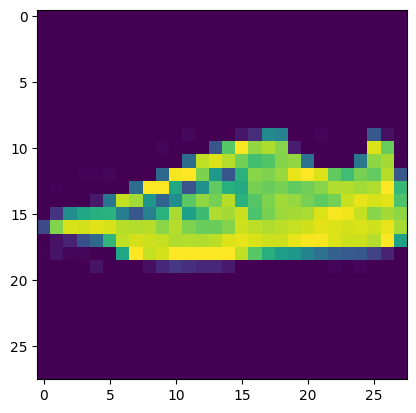

In [149]:
import matplotlib.pyplot as plt
a=x_train[0]
plt.imshow(a)

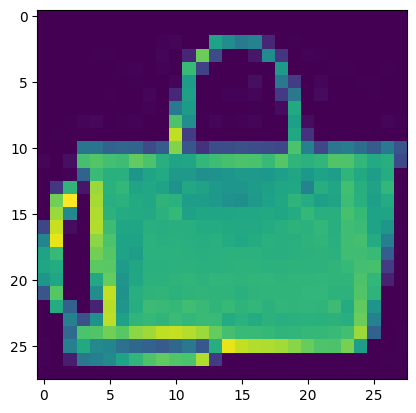

In [150]:
a=x_val[0]
plt.imshow(a)

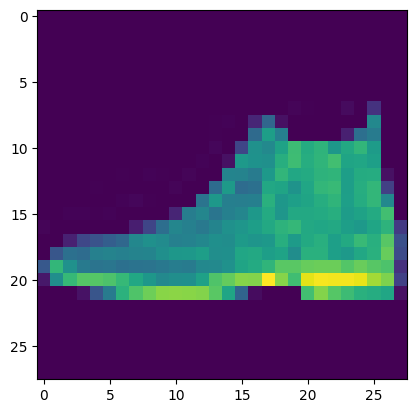

In [151]:
a=x_test[0]
plt.imshow(a)

In [152]:
y_test.shape

(10000,)

In [153]:
y_train.shape

(48000,)

In [174]:
y_val.shape

(12000,)

In [155]:
x_test.shape

(10000, 28, 28)

In [156]:
x_val.shape

(12000, 28, 28)

In [157]:
x_train.shape

(48000, 28, 28)

In [158]:
x_test.max()

255

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [159]:
x_test=x_test/255


In [160]:
x_train=x_train/255

In [176]:
x_val=x_val/255

## **Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [179]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [178]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [177]:
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [165]:
#Not required

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [184]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [186]:
model=Sequential()
model.add(Conv2D(32, (4,4), activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 25, 25, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,426 (2.26 MB)

 Trainable params: 592,106 (2.26 MB)

 Non-trainable params: 320 (1.25 KB)

In [169]:
x_train.shape

(48000, 28, 28, 1)

In [170]:
y_train.shape

(48000,)

In [172]:
x_val.shape

(48000, 28, 28, 1)

In [173]:
y_val.shape

(12000,)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [187]:
history=model.fit(x_train, y_train,validation_data=(x_val, y_val),epochs=15)

Epoch 1/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8174 - loss: 0.5185 - val_accuracy: 0.0994 - val_loss: 8.5983
Epoch 2/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8926 - loss: 0.2935 - val_accuracy: 0.1045 - val_loss: 42.4684
Epoch 3/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9099 - loss: 0.2494 - val_accuracy: 0.1015 - val_loss: 52.5003
Epoch 4/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9203 - loss: 0.2180 - val_accuracy: 0.1050 - val_loss: 30.4541
Epoch 5/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9278 - loss: 0.1920 - val_accuracy: 0.1015 - val_loss: 46.3227
Epoch 6/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9374 - loss: 0.1672 - val_accuracy: 0.1015 - val_loss: 43.7234
Epoch 7/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9462 - loss: 0.1454 - val_accuracy: 0.1045 - val_loss: 14.0593
Epoch 8/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9506 - loss: 0.1

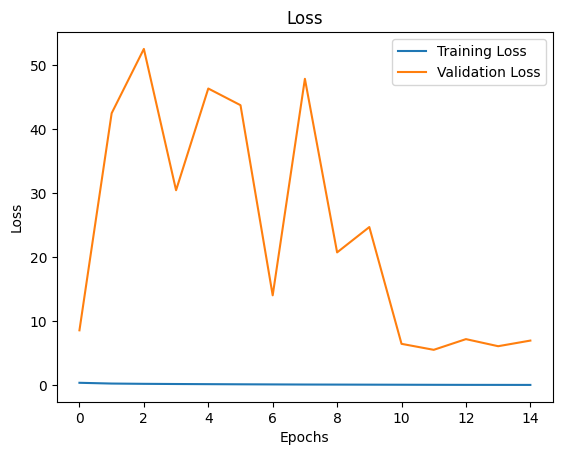

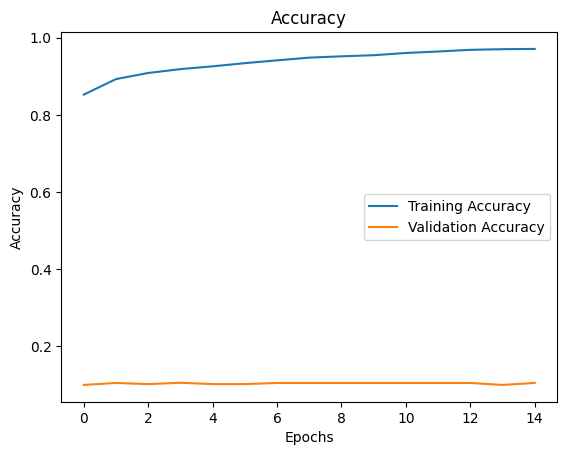

In [189]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
# prompt:  Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
y_pred_classes = [y.argmax() for y in y_pred]

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


# Great Job!